# Parallel-coordinate Plot Test

## This notebook shows how to use the `vis.plotting.pcp` module

The Parallel-coordinate plot (PCP) implemented in the `vis.plotting.pcp` module is more flexible and customized for the MCDM applications. We show how to use the module in this notebook.

### First, load the Iris data set from the pandas repository and preprocess:

- load the data from the public repository
- separate the column labels, row labels (i.e. class labels) and the actual data points.

In [ ]:
%reload_ext autoreload
%autoreload 2

import sys
import os
import ssl
import urllib
import csv
import numpy as np

sys.path.append('../')
from vis.utils.io import is_number

ssl._create_default_https_context = ssl._create_unverified_context

# read the data from the url
url = 'https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv'
response = urllib.request.urlopen(url)
lines = [l.decode('utf-8') for l in response.readlines()]
cr = csv.reader(lines)

# load the data into structure
array = []
for row in cr:
    array.append([float(v) if is_number(v) else v for v in row])
array = np.array(array, dtype=object)

# separate the column labels
column_labels = array[0]
print(column_labels)

# separate the row labels
row_labels = array[:,-1]
print(row_labels[0:10])

# separate the actual data points
data = array[1:,:]
print(data[0:10])

### Partition the data into classes

In the Iris data set, there are 3 classes. We separate data points w.r.t. class labels. Then we create arrays of labels and color values for each line for the corresponding classes. We also keep a an array of entire data (unpartitioned) and their corresponding line labels and color values.

In [ ]:
import matplotlib.colors as mc
import matplotlib.cm as cm

# column labels
Lc = column_labels[:-1]
print(Lc)

# row labels
Lr = np.unique(row_labels)[0:-1]
print(Lr)

# data
F = np.array(data, copy=True)
print(F[0:10])

# partition data into three parts
F0 = F[F[:,-1] == Lr[0]][:,:-1]
F1 = F[F[:,-1] == Lr[1]][:,:-1]
F2 = F[F[:,-1] == Lr[2]][:,:-1]

# line labels
Ll0 = np.array([Lr[0] for _ in range(F0.shape[0])])
Ll1 = np.array([Lr[1] for _ in range(F1.shape[0])])
Ll2 = np.array([Lr[2] for _ in range(F2.shape[0])])

# line colors
Cl0 = np.array([mc.to_rgba(cm.spring(v * 1.0), 1.0) for v in np.arange(0,1,1/F0.shape[0])])
Cl1 = np.array([mc.to_rgba(cm.summer(v * 2.0), 0.5) for v in np.arange(0,1,1/F1.shape[0])])
Cl2 = np.array([mc.to_rgba(cm.winter(v * 3.0), 0.25) for v in np.arange(0,1,1/F2.shape[0])])

# merge all data
G = np.row_stack((F0, F1, F2))
C = np.row_stack((Cl0, Cl1, Cl2))
Ll = np.hstack((Ll0, Ll1, Ll2))

### Do a PCP on the entire data set (with raw data and normalized data)

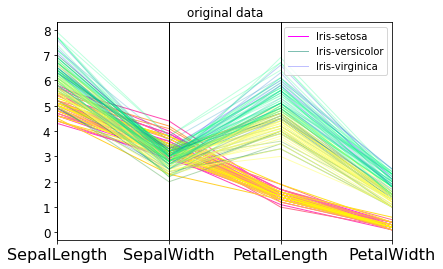

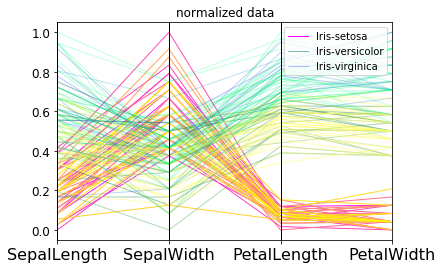

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

sys.path.append('../')
from vis.plotting import pcp

# pcp of the raw data
ax = plt.figure().gca()
pcp.plot(G, ax=ax, c=C, lw=1.00, xtick_labels=Lc, line_labels=Ll, title='original data')
plt.show()

# pcp of the normalized data
ax = plt.figure().gca()
pcp.plot(G, ax=ax, c=C, lw=1.00, xtick_labels=Lc, line_labels=Ll, normalized=True, title='normalized data')
plt.show()

### Now do a PCP with each classes of data separately

In our case, we mostly use this approach, i.e. plotting each classes of data separately. So that we will have more control over the entire visualization process.

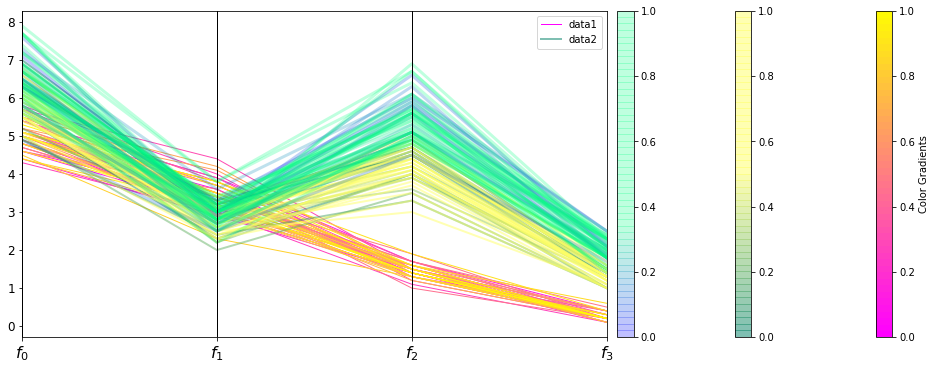

In [5]:
%matplotlib inline

# line labels
Ll0 = np.array(['data1' for _ in range(F0.shape[0])])
Ll1 = np.array(['data2' for _ in range(F1.shape[0])])
Ll2 = np.array(['data3' for _ in range(F2.shape[0])])

# line colors
d0,d1,d2 = 1/F0.shape[0], 1/F1.shape[0], 1/F2.shape[0]
Cl0 = np.array([mc.to_rgba(cm.spring(v), 1.0) for v in np.arange(0,1,d0)])
Cl1 = np.array([mc.to_rgba(cm.summer(v * 2.0), 0.5) for v in np.arange(0,1,d1)])
Cl2 = np.array([mc.to_rgba(cm.winter(v * 3.0), 0.25) for v in np.arange(0,1,d2)])

# colorbar gradients
Cg0 = np.arange(0,1+d0,d0)
Cg1 = np.arange(0,1+d1,d1)
Cg2 = np.arange(0,1+d2,d2)

# use a different xtick_labels, for testing
Lc = np.array(["$f_{:d}$".format(v) for v in range(Lc.shape[0])])

fig = plt.figure()
w,h = fig.get_size_inches()
fig.set_size_inches(w * 3, h * 1.5)
ax = fig.gca()

# plot 1st class
pcp.plot(F0, ax=ax, c=Cl0, lw=1.00, xtick_labels=Lc, line_labels=Ll0, \
     show_colorbar=True, cbar_grad=Cg0, cbar_label='Color Gradients')
# plot 2nd class
pcp.plot(F1, ax=ax, c=Cl1, lw=2.00, xtick_labels=Lc, line_labels=Ll1, show_colorbar=True, cbar_grad=Cg1)
# plot 3rd class
pcp.plot(F2, ax=ax, c=Cl2, lw=3.00, xtick_labels=Lc, show_colorbar=True, cbar_grad=Cg2)

plt.show()